In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)

In [3]:
poly_features = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly_features.fit_transform(X)


In [4]:
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

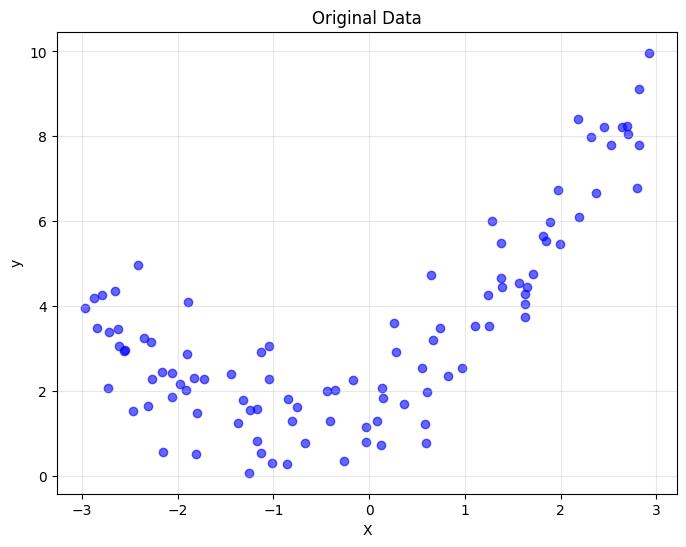

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, color='blue')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Original Data')
plt.grid(True, alpha=0.3)
plt.show()

In [8]:
X_test = np.linspace(-3, 3, 300).reshape(-1, 1)
X_test_poly = poly_features.transform(X_test)
y_pred = model.predict(X_test_poly)
y_train_pred = model.predict(X_poly)
mse = mean_squared_error(y, y_train_pred)
r2 = r2_score(y, y_train_pred)

In [9]:
model.intercept_[0], model.coef_[0], mse,r2

(1.6680073029015523,
 array([ 1.03378043,  0.68601582, -0.01833373, -0.0159345 ]),
 0.7635386782209403,
 0.8550981504662788)

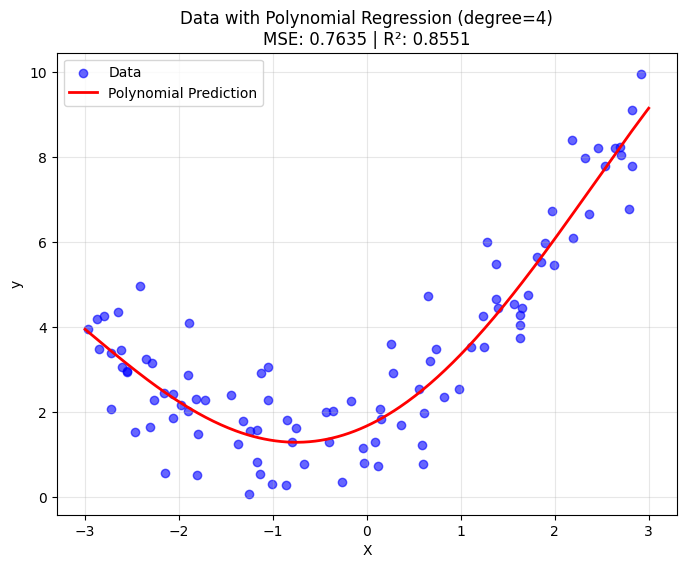

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, alpha=0.6, color='blue', label='Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Polynomial Prediction')
plt.xlabel('X')
plt.ylabel('y')
plt.title(f'Data with Polynomial Regression (degree=4)\nMSE: {mse:.4f} | R²: {r2:.4f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()